<a href="https://colab.research.google.com/github/romqn1999/Predict-price-after-pattern/blob/main/Predict_price_after_pattern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving AAPL_2000-01-01 00_00_00_2021-05-17_30_data_patterns.csv to AAPL_2000-01-01 00_00_00_2021-05-17_30_data_patterns.csv
Saving AMC_2000-01-01 00_00_00_2021-05-18_30_data_patterns.csv to AMC_2000-01-01 00_00_00_2021-05-18_30_data_patterns.csv
Saving AMZN_2000-01-01 00_00_00_2021-05-18_30_data_patterns.csv to AMZN_2000-01-01 00_00_00_2021-05-18_30_data_patterns.csv
Saving BB_2000-01-01 00_00_00_2021-05-18_30_data_patterns.csv to BB_2000-01-01 00_00_00_2021-05-18_30_data_patterns.csv
Saving DAX_2000-01-01 00_00_00_2021-05-18_30_data_patterns.csv to DAX_2000-01-01 00_00_00_2021-05-18_30_data_patterns.csv
Saving FB_2000-01-01 00_00_00_2021-05-18_30_data_patterns.csv to FB_2000-01-01 00_00_00_2021-05-18_30_data_patterns.csv
Saving GME_2000-01-01 00_00_00_2021-05-18_30_data_patterns.csv to GME_2000-01-01 00_00_00_2021-05-18_30_data_patterns.csv
Saving GOOG_2000-01-01 00_00_00_2021-05-17_30_data_patterns.csv to GOOG_2000-01-01 00_00_00_2021-05-17_30_data_patterns.csv
Saving IBM_2000-01-01 

## Import packages

In [2]:
import math
import matplotlib.pyplot as plt
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from keras import optimizers
from keras.optimizers import Adagrad, Adadelta, RMSprop, Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

## Get data at pattern for training

In [3]:
import io
import pandas as pd

price_patterns_df = pd.DataFrame()
for filename in uploaded.keys():
    print(filename)
    if 'data_patterns.csv' not in filename:
        print('Skipping file', filename)
        continue
    df = pd.read_csv(io.StringIO(uploaded[filename].decode('utf-8')),
                     header=None)
    price_patterns_df = price_patterns_df.append(df)

price_patterns_df.reset_index()
price_patterns_df

AAPL_2000-01-01 00_00_00_2021-05-17_30_data_patterns.csv
AMC_2000-01-01 00_00_00_2021-05-18_30_data_patterns.csv
AMZN_2000-01-01 00_00_00_2021-05-18_30_data_patterns.csv
BB_2000-01-01 00_00_00_2021-05-18_30_data_patterns.csv
DAX_2000-01-01 00_00_00_2021-05-18_30_data_patterns.csv
FB_2000-01-01 00_00_00_2021-05-18_30_data_patterns.csv
GME_2000-01-01 00_00_00_2021-05-18_30_data_patterns.csv
GOOG_2000-01-01 00_00_00_2021-05-17_30_data_patterns.csv
IBM_2000-01-01 00_00_00_2021-05-18_30_data_patterns.csv
NFLX_2000-01-01 00_00_00_2021-05-18_30_data_patterns.csv
SNP_2000-01-01 00_00_00_2021-05-17_30_data_patterns.csv
SPY_2000-01-01 00_00_00_2021-05-18_30_data_patterns.csv
TSLA_2000-01-01 00_00_00_2021-05-18_30_data_patterns.csv


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,5.032500,4.680357,4.530000,4.596786,4.711786,4.580000,3.759286,4.059286,3.897143,3.575000,3.466786,3.505000,3.184286,3.206786,3.169286,3.457143,3.937857,3.717143,3.498214,3.638929,3.478571,3.515714,3.267500,3.459643,3.508214,3.442143,3.288929,3.568214,3.733929,3.965714,3.842500
1,3.575000,3.466786,3.505000,3.184286,3.206786,3.169286,3.457143,3.937857,3.717143,3.498214,3.638929,3.478571,3.515714,3.267500,3.459643,3.508214,3.442143,3.288929,3.568214,3.733929,3.965714,3.842500,3.820000,3.963929,3.689286,3.539286,3.508571,3.424286,3.384643,3.218571,3.444286
2,3.064643,3.093214,3.081786,3.048214,3.241071,3.377857,3.322143,3.250357,3.310714,3.235000,3.166429,3.132500,3.047500,2.977857,2.940357,2.792857,2.958214,3.155714,3.155714,3.201429,3.240357,3.364286,3.321429,3.218929,3.268214,3.320714,3.341071,3.445000,3.561429,3.661071,3.493929
3,3.064643,3.093214,3.081786,3.048214,3.241071,3.377857,3.322143,3.250357,3.310714,3.235000,3.166429,3.132500,3.047500,2.977857,2.940357,2.792857,2.958214,3.155714,3.155714,3.201429,3.240357,3.364286,3.321429,3.218929,3.268214,3.320714,3.341071,3.445000,3.561429,3.661071,3.493929
4,3.064643,3.093214,3.081786,3.048214,3.241071,3.377857,3.322143,3.250357,3.310714,3.235000,3.166429,3.132500,3.047500,2.977857,2.940357,2.792857,2.958214,3.155714,3.155714,3.201429,3.240357,3.364286,3.321429,3.218929,3.268214,3.320714,3.341071,3.445000,3.561429,3.661071,3.493929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,54.804001,52.905998,52.084000,53.554001,54.966000,55.723999,55.972000,57.835999,57.175999,58.362000,53.556000,54.992001,54.639999,54.462002,55.212002,53.683998,53.540001,53.276001,54.672001,54.245998,54.652000,52.549999,52.779999,51.731998,49.526001,47.028000,48.293999,47.737999,46.801998,48.820000,51.006001
67,41.071999,41.015999,38.546001,39.098000,38.125999,37.740002,37.972000,37.644001,37.032001,35.793999,38.720001,39.318001,41.189999,40.900002,42.576000,43.419998,41.852001,42.782001,42.984001,45.006001,44.948002,45.285999,43.924000,44.372002,44.728001,43.952000,43.854000,44.568001,44.692001,45.433998,44.910000
68,47.001999,45.801998,47.000000,43.924000,43.127998,43.987999,45.366001,45.172001,44.166000,44.430000,42.279999,43.000000,42.816002,43.118000,44.341999,45.122002,45.001999,44.136002,45.916000,45.490002,46.358002,47.108002,49.419998,49.174000,49.040001,48.562000,48.958000,48.698002,49.320000,48.124001,48.245998
69,158.192001,160.666000,159.834000,162.725998,161.602005,163.112000,165.520004,163.376007,163.774002,164.046005,161.162003,167.000000,179.619995,176.311996,176.591995,172.876007,177.132004,189.983994,188.134003,205.009995,194.567993,187.056000,198.179993,196.425995,198.358002,200.792007,200.179993,198.863998,200.356003,192.169998,197.195999


In [4]:
#@title Separate into input and output columns: Get data: X and y

X_df = price_patterns_df[price_patterns_df.columns[:-1]]
y_df = price_patterns_df[price_patterns_df.columns[-1:]]
print(X_df)
print(y_df)

X_data = X_df.values
y_data = y_df.values
print(X_data)
print(y_data)

            0           1           2   ...          27          28          29
0     5.032500    4.680357    4.530000  ...    3.568214    3.733929    3.965714
1     3.575000    3.466786    3.505000  ...    3.424286    3.384643    3.218571
2     3.064643    3.093214    3.081786  ...    3.445000    3.561429    3.661071
3     3.064643    3.093214    3.081786  ...    3.445000    3.561429    3.661071
4     3.064643    3.093214    3.081786  ...    3.445000    3.561429    3.661071
..         ...         ...         ...  ...         ...         ...         ...
66   54.804001   52.905998   52.084000  ...   47.737999   46.801998   48.820000
67   41.071999   41.015999   38.546001  ...   44.568001   44.692001   45.433998
68   47.001999   45.801998   47.000000  ...   48.698002   49.320000   48.124001
69  158.192001  160.666000  159.834000  ...  198.863998  200.356003  192.169998
70  162.725998  161.602005  163.112000  ...  197.195999  191.947998  201.869995

[1348 rows x 30 columns]
            30

In [5]:
#@title Preprocess & split data for train model
# Train, test split
train_ratio = 0.8 #@param {type:"number"}
if train_ratio < 0 or  train_ratio > 1:
    train_ratio = 0.8
n_data = len(X_data)
n_train = int(train_ratio * n_data)
n_test = n_data - n_train
# Feature Scaling
scale_method = "MinMax" #@param ["None", "MinMax"]

X_train, y_train = X_data[: n_train], y_data[: n_train]
X_test, y_test = X_data[n_train:], y_data[n_train:]
if scale_method == 'MinMax':
    sc_train = MinMaxScaler(feature_range = (0, 1))
    X_train_scaled = sc_train.fit_transform(X_train.T).T
    y_train_scaled = sc_train.transform(y_train.T).T
    sc_test = MinMaxScaler(feature_range = (0, 1))
    X_test_scaled = sc_test.fit_transform(X_test.T).T
    y_test_scaled = sc_test.transform(y_test.T).T
    # X_train, y_train = X_train_scaled, y_train_scaled
    # X_test, y_test = X_test_scaled, y_test_scaled
print(X_train.shape, y_train.shape)
print(X_train_scaled.shape, y_train_scaled.shape)
print(X_test.shape, y_test.shape)
print(X_test_scaled.shape, y_test_scaled.shape)

# print(X_train)
# print(y_train)

(1078, 30) (1078, 1)
(1078, 30) (1078, 1)
(270, 30) (270, 1)
(270, 30) (270, 1)


## LSTM model

### Build model

In [6]:
#@title Build & fit model
lstm_units = 50 #@param {type:"integer"}
dropout_prob = 0.5 #@param {type:"number"}
epochs = 8000 #@param {type:"integer"}
batch_size = 2048 #@param {type:"integer"}

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units=lstm_units,
               return_sequences=True,
               input_shape=(X_data.shape[1], 1)))
model.add(Dropout(dropout_prob))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units=lstm_units,
               return_sequences=True))
model.add(Dropout(dropout_prob))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units=lstm_units,
               return_sequences=True))
model.add(Dropout(dropout_prob))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units=lstm_units))
model.add(Dropout(dropout_prob))
# Adding the output layer
model.add(Dense(units=1))

# Adam optimizer
opt = Adam(learning_rate=0.0005, epsilon=1e-06, decay=1e-06)
# # PiecewiseConstantDecay optimizer
# boundaries = [200, 800, 2000, 4000]
# values = [0.01, 0.001, 0.0005, 0.0001, 0.00001]
# opt = keras.optimizers.schedules.PiecewiseConstantDecay(
#     boundaries, values)
# Compiling the RNN
# model.compile(optimizer = opt, loss = 'mean_squared_error')
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Train model

In [7]:
def train_lstm(model, X_train, y_train, epochs, batch_size):
    # We have now reshaped the data into the following format (#values, #time-steps, #1 dimensional output).
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    y_train = np.reshape(y_train, (y_train.shape[0], 1))

    # Fitting the RNN to the Training set
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)
    return model

model = train_lstm(model, X_train_scaled, y_train_scaled, epochs, batch_size)
model.save('LSTM_predict_price_pattern')

Streaming output truncated to the last 5000 lines.
Epoch 5501/8000
1/1 [==============================] - 1s 697ms/step - loss: 0.0089
Epoch 5502/8000
1/1 [==============================] - 1s 699ms/step - loss: 0.0092
Epoch 5503/8000
1/1 [==============================] - 1s 713ms/step - loss: 0.0091
Epoch 5504/8000
1/1 [==============================] - 1s 719ms/step - loss: 0.0093
Epoch 5505/8000
1/1 [==============================] - 1s 721ms/step - loss: 0.0087
Epoch 5506/8000
1/1 [==============================] - 1s 707ms/step - loss: 0.0093
Epoch 5507/8000
1/1 [==============================] - 1s 689ms/step - loss: 0.0102
Epoch 5508/8000
1/1 [==============================] - 1s 706ms/step - loss: 0.0102
Epoch 5509/8000
1/1 [==============================] - 1s 702ms/step - loss: 0.0089
Epoch 5510/8000
1/1 [==============================] - 1s 706ms/step - loss: 0.0092
Epoch 5511/8000
1/1 [==============================] - 1s 722ms/step - loss: 0.0093
Epoch 5512/8000
1/1 [====

INFO:tensorflow:Assets written to: LSTM_predict_price_pattern/assets


INFO:tensorflow:Assets written to: LSTM_predict_price_pattern/assets


### Test model

In [8]:
# X_test = X_train
model = keras.models.load_model("LSTM_predict_price_pattern")

In [9]:
predicted_stock_price = model.predict(np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1)))
if scale_method == 'MinMax':
    predicted_stock_price = sc_test.inverse_transform(predicted_stock_price.T).T
    # y_test = sc_test.inverse_transform(y_test.T).T

In [10]:
y_test, predicted_stock_price

(array([[ 85.0615387 ],
        [122.53076935],
        [ 67.37692261],
        [ 66.40769196],
        [ 67.02307892],
        [ 60.88461685],
        [ 58.38461685],
        [ 62.38461685],
        [ 75.15384674],
        [ 72.66153717],
        [ 73.36923218],
        [ 83.1692276 ],
        [ 78.95384979],
        [ 75.75384521],
        [ 74.90769196],
        [ 75.9384613 ],
        [ 73.68461609],
        [ 70.71538544],
        [ 72.34615326],
        [ 72.34615326],
        [ 80.61538696],
        [ 91.69230652],
        [ 88.85384369],
        [ 87.03076935],
        [ 89.29230499],
        [ 88.93077087],
        [ 86.64615631],
        [ 88.7692337 ],
        [ 85.04615021],
        [ 79.97000122],
        [ 77.91000366],
        [ 78.66999817],
        [ 76.62000275],
        [ 82.98999786],
        [ 89.48999786],
        [100.26000214],
        [ 85.80999756],
        [ 86.18000031],
        [ 80.65000153],
        [ 81.91000366],
        [ 79.73000336],
        [ 77.330

In [11]:
float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})
print(y_test - predicted_stock_price)
print(max(abs(y_test - predicted_stock_price)))

[[-0.16]
 [-3.95]
 [0.09]
 [1.59]
 [0.43]
 [-2.44]
 [0.69]
 [-1.02]
 [-1.04]
 [-1.34]
 [1.86]
 [0.37]
 [4.02]
 [-1.01]
 [0.56]
 [0.56]
 [-1.01]
 [-1.53]
 [-0.92]
 [-0.92]
 [1.07]
 [-0.26]
 [2.82]
 [1.52]
 [-0.31]
 [1.22]
 [3.26]
 [-0.06]
 [3.87]
 [-0.29]
 [-1.27]
 [-3.00]
 [-0.89]
 [-2.66]
 [0.32]
 [2.60]
 [2.70]
 [0.40]
 [-0.08]
 [-0.00]
 [0.51]
 [-0.24]
 [-0.82]
 [-3.23]
 [1.90]
 [2.84]
 [-0.21]
 [0.04]
 [-0.55]
 [0.57]
 [0.43]
 [0.46]
 [-0.48]
 [-0.67]
 [-0.76]
 [1.10]
 [0.46]
 [0.97]
 [0.06]
 [-1.11]
 [2.13]
 [1.46]
 [-0.58]
 [-0.43]
 [-0.59]
 [-0.59]
 [3.16]
 [-1.81]
 [0.19]
 [-1.18]
 [-2.60]
 [0.93]
 [0.23]
 [-1.02]
 [-0.31]
 [-0.13]
 [-3.09]
 [-1.97]
 [2.14]
 [-0.91]
 [0.05]
 [-0.39]
 [-2.00]
 [2.16]
 [-2.71]
 [-0.27]
 [-0.70]
 [-0.46]
 [1.83]
 [2.26]
 [2.26]
 [-1.05]
 [1.40]
 [-0.74]
 [-0.32]
 [-0.59]
 [1.12]
 [-2.40]
 [0.06]
 [-0.70]
 [0.80]
 [0.59]
 [1.02]
 [-0.09]
 [-0.37]
 [-0.57]
 [-1.74]
 [-0.08]
 [-0.05]
 [0.78]
 [-1.68]
 [1.10]
 [0.82]
 [-1.24]
 [-0.39]
 [-0.85]
 [0.79]

In [12]:
# Calculate RMSE and MAPE
from sklearn.metrics import mean_squared_error

def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

rmse = math.sqrt(mean_squared_error(y_test, predicted_stock_price))
mape = get_mape(y_test, predicted_stock_price)

rmse, mape

(2.089056932939943, 1.7650364865055606)

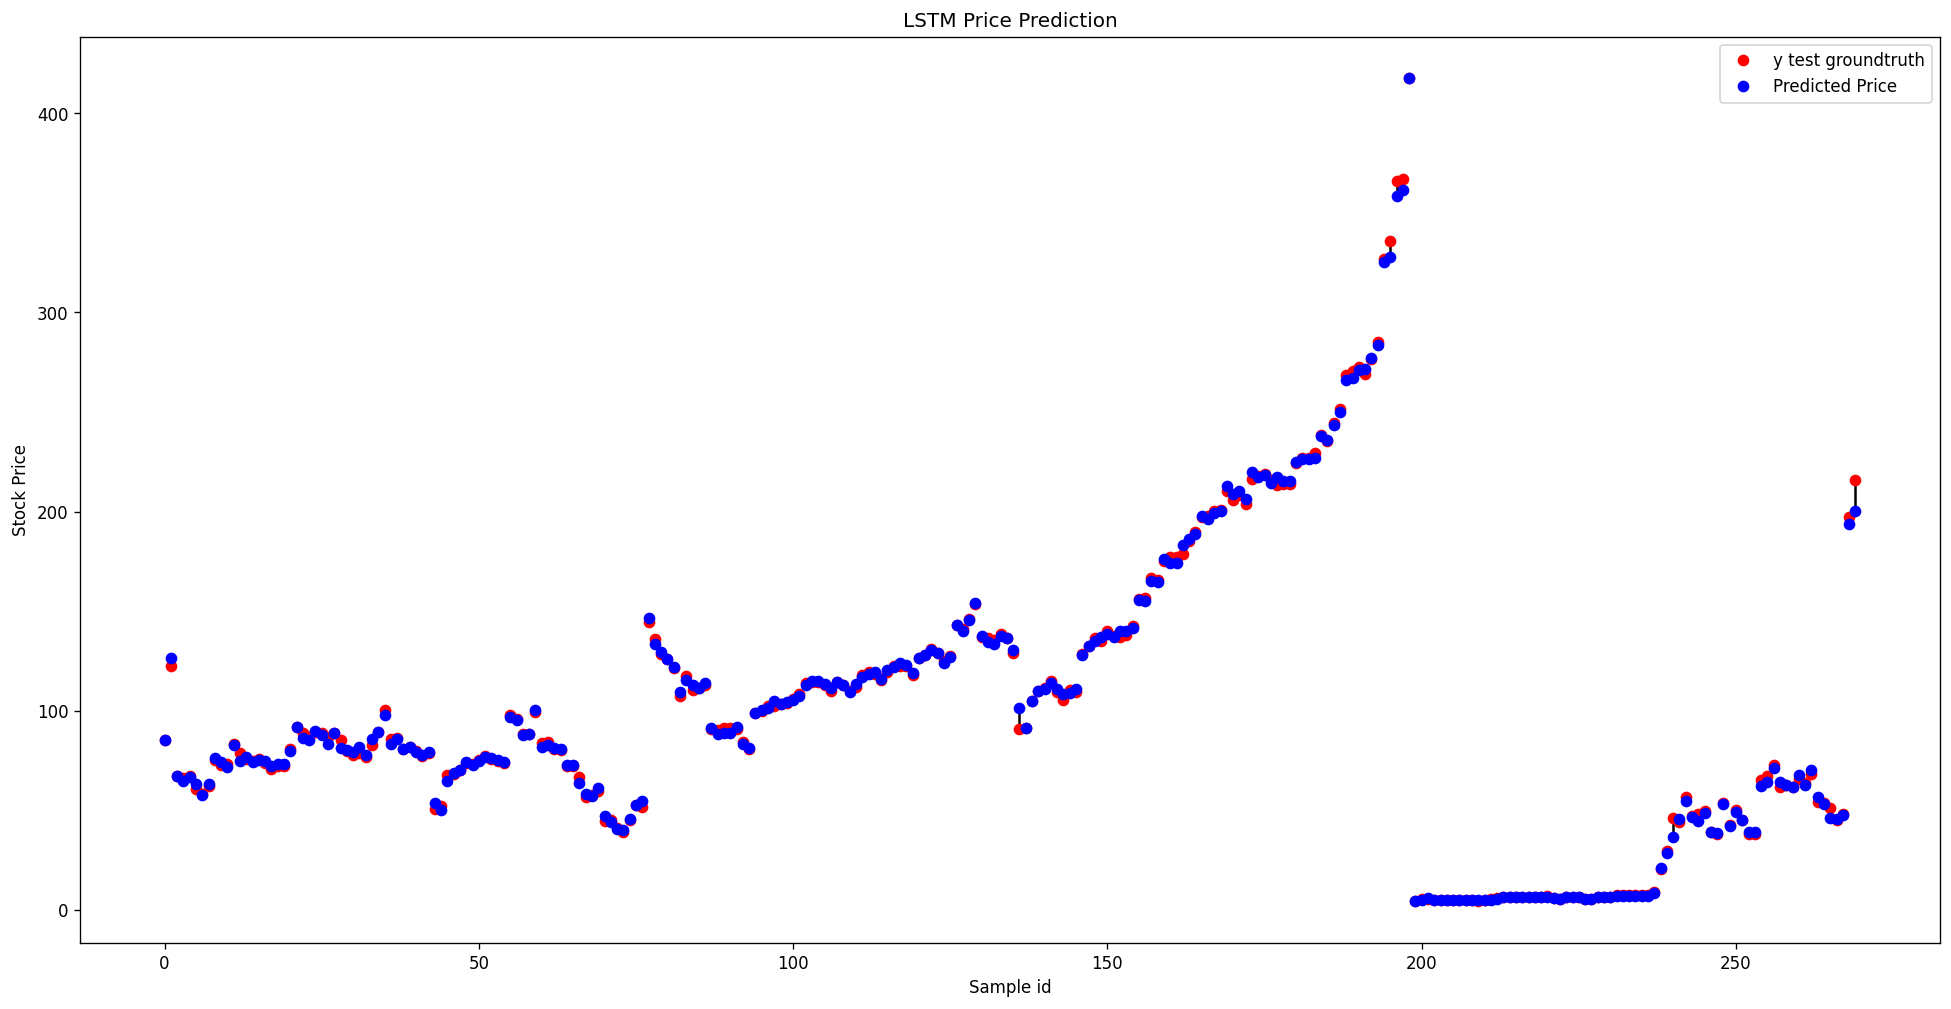

In [13]:
# Visualising the results
plt.figure(figsize=(20, 10), dpi= 120, facecolor='w', edgecolor='k')
plt.plot(range(len(y_test)), y_test, 'o', color = 'red', label = 'y test groundtruth')
plt.plot(range(len(y_test)), predicted_stock_price, 'o', color = 'blue', label = 'Predicted Price')
plt.vlines(range(len(y_test)), np.minimum(y_test, predicted_stock_price), np.maximum(y_test, predicted_stock_price))
# plt.xticks(np.arange(0,459,50))
plt.title('LSTM Price Prediction')
plt.xlabel('Sample id')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## XGBoost model

### Build model

In [14]:
#@title Build model
seed = 100 #@param {type:"integer"}
n_estimators = 100 #@param {type:"integer"}
max_depth = 3 #@param {type:"integer"}
learning_rate = 0.1 #@param {type:"number"}
min_child_weight = 0 #@param {type:"number"}
subsample = 1 #@param {type:"number"}
colsample_bytree = 1 #@param {type:"number"}
colsample_bylevel = 1 #@param {type:"number"}
gamma = 0 #@param {type:"number"}
from xgboost import XGBRegressor

xgbmodel = XGBRegressor(seed=seed,
                        n_estimators=n_estimators,
                        max_depth=max_depth,
                        learning_rate=learning_rate,
                        min_child_weight=min_child_weight,
                        subsample=subsample,
                        colsample_bytree=colsample_bytree,
                        colsample_bylevel=colsample_bylevel,
                        gamma=gamma)

### Train the model

In [15]:
xgbmodel.fit(np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1])), np.reshape(y_train_scaled, (y_train_scaled.shape[0])))

[15:31:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=0, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=100,
             silent=None, subsample=1, verbosity=1)

### Test model

In [16]:
predicted_stock_price = xgbmodel.predict(np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1])))
predicted_stock_price = np.reshape(predicted_stock_price, (predicted_stock_price.shape[0], 1))
if scale_method == 'MinMax':
    predicted_stock_price = sc_test.inverse_transform(predicted_stock_price.T).T
    # y_test = sc_test.inverse_transform(y_test.T).T

In [17]:
float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})
print(y_test - predicted_stock_price)
print(max(abs(y_test - predicted_stock_price)))

[[1.93]
 [-4.27]
 [-4.15]
 [-1.09]
 [0.37]
 [-1.29]
 [1.09]
 [0.03]
 [0.89]
 [-1.64]
 [1.61]
 [-0.11]
 [0.15]
 [-0.29]
 [0.97]
 [0.89]
 [-0.05]
 [-1.70]
 [-1.10]
 [-1.10]
 [0.57]
 [0.33]
 [0.44]
 [1.12]
 [1.36]
 [-1.69]
 [-1.09]
 [-0.14]
 [1.07]
 [0.26]
 [-0.41]
 [-0.57]
 [-0.66]
 [-3.27]
 [0.72]
 [2.22]
 [0.67]
 [1.00]
 [1.16]
 [1.40]
 [0.69]
 [0.37]
 [0.46]
 [-4.63]
 [0.83]
 [1.86]
 [-0.03]
 [1.10]
 [-0.67]
 [-0.05]
 [-0.97]
 [0.81]
 [0.06]
 [-0.37]
 [-0.22]
 [0.56]
 [0.33]
 [-3.59]
 [1.01]
 [0.43]
 [0.73]
 [0.11]
 [-0.45]
 [-0.24]
 [-0.80]
 [-0.80]
 [-0.82]
 [-0.92]
 [-0.20]
 [-0.57]
 [-1.96]
 [0.50]
 [0.08]
 [-0.23]
 [-0.00]
 [-0.17]
 [-1.66]
 [-2.88]
 [0.81]
 [-2.19]
 [0.29]
 [-0.94]
 [-0.79]
 [2.31]
 [-3.53]
 [-0.47]
 [-0.30]
 [0.92]
 [2.05]
 [-0.23]
 [-0.23]
 [-0.79]
 [0.82]
 [-0.47]
 [-1.00]
 [-0.32]
 [0.13]
 [0.20]
 [-0.66]
 [-0.68]
 [0.13]
 [-0.28]
 [0.32]
 [-0.47]
 [-0.44]
 [-0.09]
 [-1.25]
 [-0.44]
 [0.02]
 [1.11]
 [-0.45]
 [0.99]
 [0.31]
 [-1.06]
 [-0.24]
 [-1.33]
 [-0.59]

In [18]:
rmse = math.sqrt(mean_squared_error(y_test, predicted_stock_price))
mape = get_mape(y_test, predicted_stock_price)

rmse, mape

(1.659882138559629, 1.3311737229620486)

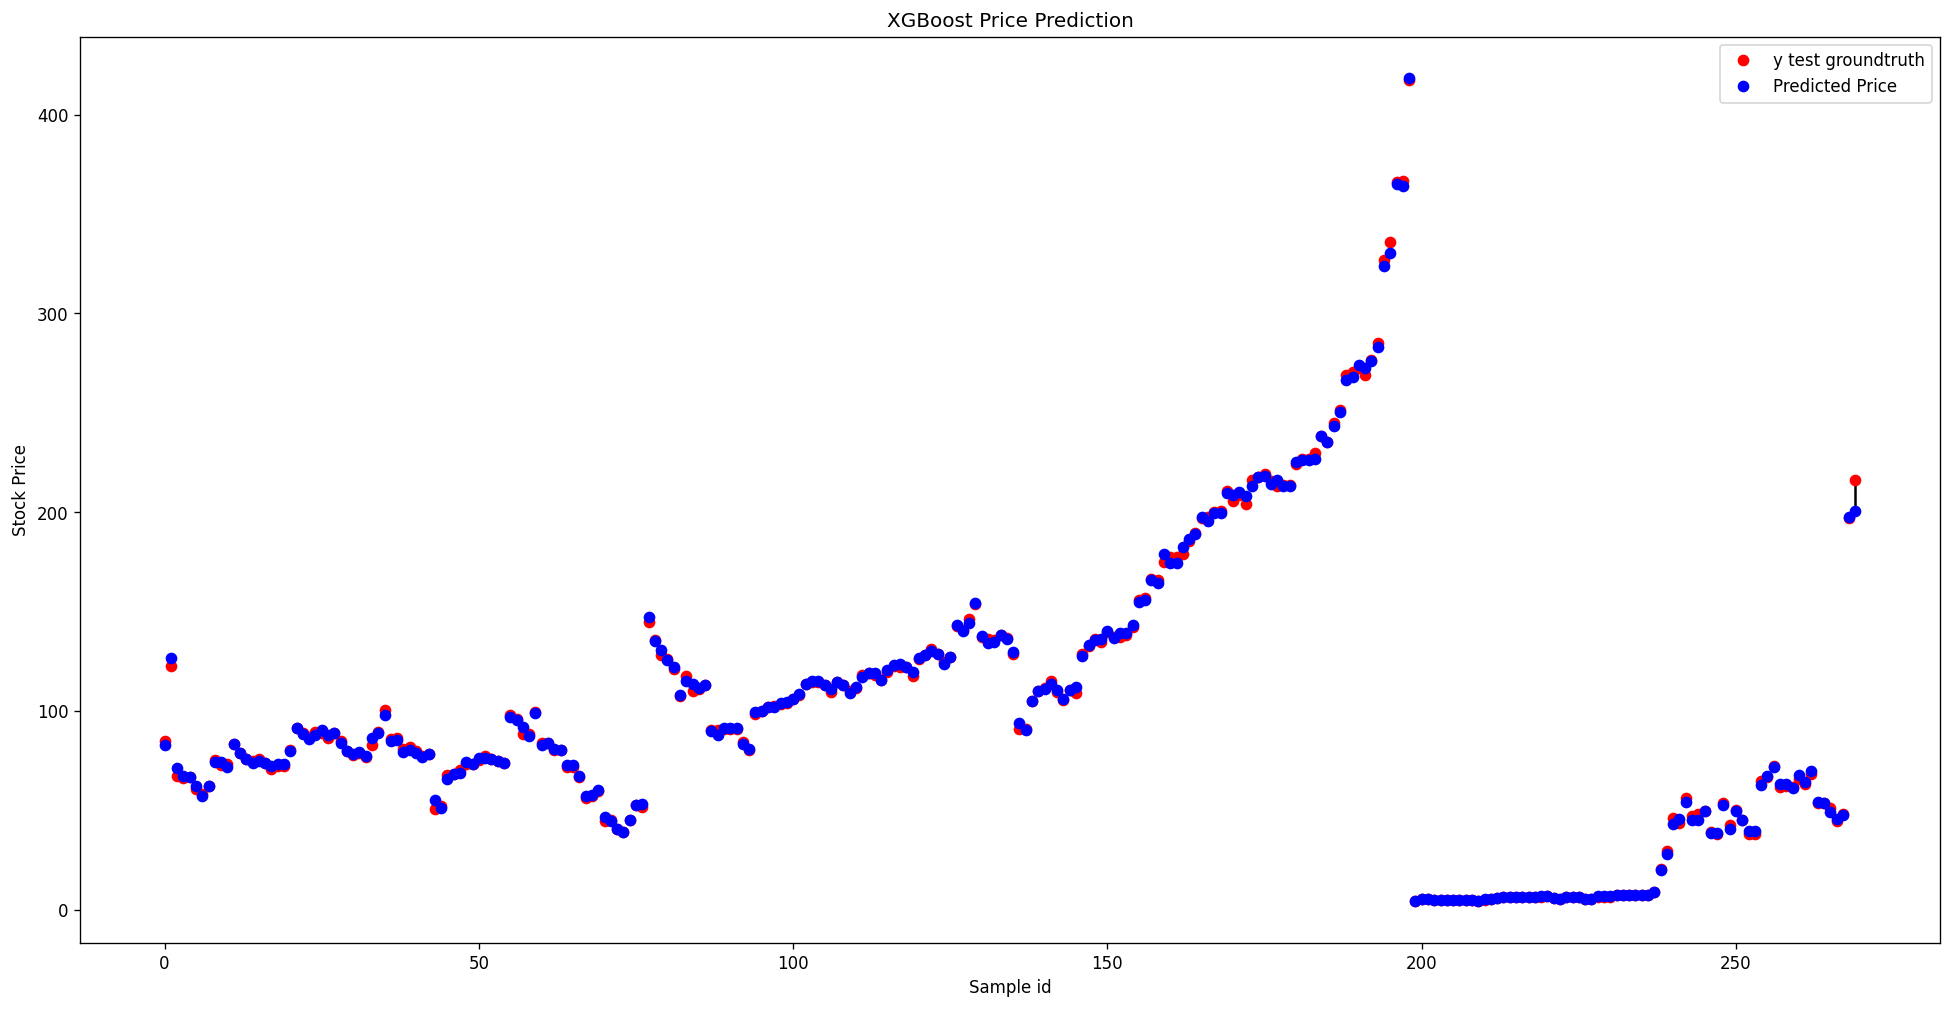

In [19]:
# Visualising the results
plt.figure(figsize=(20, 10), dpi= 120, facecolor='w', edgecolor='k')
plt.plot(range(len(y_test)), y_test, 'o', color = 'red', label = 'y test groundtruth')
plt.plot(range(len(y_test)), predicted_stock_price, 'o', color = 'blue', label = 'Predicted Price')
plt.vlines(range(len(y_test)), np.minimum(y_test, predicted_stock_price), np.maximum(y_test, predicted_stock_price))
# plt.xticks(np.arange(0,459,50))
plt.title('XGBoost Price Prediction')
plt.xlabel('Sample id')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [20]:
!zip -r /content/LSTM_predict_price_pattern_model.zip /content/LSTM_predict_price_pattern

  adding: content/LSTM_predict_price_pattern/ (stored 0%)
  adding: content/LSTM_predict_price_pattern/assets/ (stored 0%)
  adding: content/LSTM_predict_price_pattern/saved_model.pb (deflated 90%)
  adding: content/LSTM_predict_price_pattern/variables/ (stored 0%)
  adding: content/LSTM_predict_price_pattern/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/LSTM_predict_price_pattern/variables/variables.index (deflated 69%)
